# Johns Hopkins Covid19

<img src="COVID.jpg" width="">

# Contents

* PROBLEM STATEMENT
* DOMAIN ANALYSIS
* DATASETS
* COMBINING THE DATASETS
* DATA DESCRIPTION
  - For continnuous values
  - For categorical values
  - Insights from description
* MAXIMUM CONFIRMED / RECOVERED / DEATH CASES
* DISTRIBUTION OF COUNTRY AND STATUS
* TOP 10 COUNTRIES IN EACH CATEGORIES
* TIME SERIES PLOT FOR TOP 1-20 COUNTRIES
* DATA ANALYSIS REPORT
* SELECTING A SPECIFIC COUNTRY (US) FOR CONFIRMED CASES
  - Plot for US confirmed cases
  - Decompose timeseries components
* ADFULLER TEST
* DECOMPOSING
  - Decomposing 1
  - Decomposing 2
  - Decomposing 3
* PLOT TO CHECK STATIONARY
* PLOTTING ACF AND PACF PLOT
* TRAINING AND TESTING OF DATA
* ARIMA MODEL
  - Plot based on iterating params over pdq
  - Plot based on intuition
  - Plot for next 25 forecast
  - Accuracy Metrics
* SARIMAX MODEL
  - Plot for next 10 forecast
  - Plot for next 25 forecast
  - Accuracy Metrics
* MODEL COMPARISON REPORT
* SUGGESTION
* REPORT ON CHALLENGES FACED
* CONCLUSION


# Problem Statement

##### Task 1:- Prepare a complete data analysis report on the given data.

##### Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

##### Task3:- Make suggestions to the government health department of the country/region for preparation based on your predictions.


# Domain Analysis Report: John Hopkins COVID-19 Dataset

##### Overview:
The dataset from John Hopkins provides comprehensive information on the global impact of the COVID-19 pandemic.

##### Temporal Coverage:
The dataset spans multiple dates, allowing for temporal analysis and trend identification.

##### Geographical Coverage:
The dataset covers a diverse set of countries, showcasing the global impact of COVID-19.

##### Status:
'Confirmed', 'Death', and 'Recovered' cases, providing a detailed breakdown of COVID-19 outcomes.

##### Country-Specific Analysis:
In-depth analysis of specific countries, such as China with a notable frequency, can provide insights into regional trends.

##### Use Cases:
The dataset is valuable for epidemiologists, researchers, and policymakers for understanding the global and regional dynamics of the COVID-19 pandemic.

##### Limitations:
While informative, the dataset may have limitations such as reporting discrepancies, data entry errors, and variations in testing capacities among countries.

##### Recommendations:
Further exploration and statistical modeling could enhance insights into the progression of the pandemic.
Careful consideration is needed when interpreting results, considering potential biases and limitations.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
confirmed_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
recovery_data = pd.read_csv('time_series_covid19_recovered_global.csv')
death_data = pd.read_csv('time_series_covid19_deaths_global.csv')

# Datasets

In [3]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [4]:
recovery_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [5]:
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


# Combining the datasets

In [6]:
import pandas as pd

def reshape_data(input_df):
    # Melting the DataFrame
    melted_df = pd.melt(input_df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Count')
    melted_df['Date'] = pd.to_datetime(melted_df['Date'])
    
    # Sorting the DataFrame by date & Country
    melted_df = melted_df.sort_values(by=['Country/Region', 'Date'])
    return melted_df


In [7]:
reshaped_confirmed = reshape_data(confirmed_data)
reshaped_recovery = reshape_data(recovery_data)
reshaped_death = reshape_data(death_data)

In [8]:
reshaped_confirmed['Status'] = 'Confirmed'
reshaped_recovery['Status'] = 'Recovered'
reshaped_death['Status'] = 'Death'

In [9]:
reshaped_confirmed.head()

,Province/State,Country/Region,Lat,Long,Date,Count,Status
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,Confirmed
266,NaN,Afghanistan,33.93911,67.709953,2020-01-23,0,Confirmed
532,NaN,Afghanistan,33.93911,67.709953,2020-01-24,0,Confirmed
798,NaN,Afghanistan,33.93911,67.709953,2020-01-25,0,Confirmed
1064,NaN,Afghanistan,33.93911,67.709953,2020-01-26,0,Confirmed


In [10]:
reshaped_recovery.head()

,Province/State,Country/Region,Lat,Long,Date,Count,Status
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,Recovered
253,NaN,Afghanistan,33.93911,67.709953,2020-01-23,0,Recovered
506,NaN,Afghanistan,33.93911,67.709953,2020-01-24,0,Recovered
759,NaN,Afghanistan,33.93911,67.709953,2020-01-25,0,Recovered
1012,NaN,Afghanistan,33.93911,67.709953,2020-01-26,0,Recovered


In [11]:
reshaped_death.head()

,Province/State,Country/Region,Lat,Long,Date,Count,Status
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,Death
266,NaN,Afghanistan,33.93911,67.709953,2020-01-23,0,Death
532,NaN,Afghanistan,33.93911,67.709953,2020-01-24,0,Death
798,NaN,Afghanistan,33.93911,67.709953,2020-01-25,0,Death
1064,NaN,Afghanistan,33.93911,67.709953,2020-01-26,0,Death


In [12]:
Covid_data = pd.concat([reshaped_confirmed, reshaped_recovery, reshaped_death], ignore_index=True)

In [13]:
Covid_data

,Province/State,Country/Region,Lat,Long,Date,Count,Status
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,Confirmed
1,NaN,Afghanistan,33.939110,67.709953,2020-01-23,0,Confirmed
2,NaN,Afghanistan,33.939110,67.709953,2020-01-24,0,Confirmed
3,NaN,Afghanistan,33.939110,67.709953,2020-01-25,0,Confirmed
4,NaN,Afghanistan,33.939110,67.709953,2020-01-26,0,Confirmed
...,...,...,...,...,...,...,...
191535,NaN,Zimbabwe,-19.015438,29.154857,2020-09-17,224,Death
191536,NaN,Zimbabwe,-19.015438,29.154857,2020-09-18,224,Death
191537,NaN,Zimbabwe,-19.015438,29.154857,2020-09-19,225,Death
191538,NaN,Zimbabwe,-19.015438,29.154857,2020-09-20,225,Death


In [14]:
# Renaming the Country/Region column as Country
Covid_data = Covid_data.rename(columns={'Country/Region': 'Country'})

In [15]:
# Droping the Province/State column
Covid_data = Covid_data.drop(columns=['Province/State'])

In [16]:
Covid_data

,Country,Lat,Long,Date,Count,Status
0,Afghanistan,33.939110,67.709953,2020-01-22,0,Confirmed
1,Afghanistan,33.939110,67.709953,2020-01-23,0,Confirmed
2,Afghanistan,33.939110,67.709953,2020-01-24,0,Confirmed
3,Afghanistan,33.939110,67.709953,2020-01-25,0,Confirmed
4,Afghanistan,33.939110,67.709953,2020-01-26,0,Confirmed
...,...,...,...,...,...,...
191535,Zimbabwe,-19.015438,29.154857,2020-09-17,224,Death
191536,Zimbabwe,-19.015438,29.154857,2020-09-18,224,Death
191537,Zimbabwe,-19.015438,29.154857,2020-09-19,225,Death
191538,Zimbabwe,-19.015438,29.154857,2020-09-20,225,Death


In [17]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191540 entries, 0 to 191539
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Country  191540 non-null  object        
 1   Lat      191540 non-null  float64       
 2   Long     191540 non-null  float64       
 3   Date     191540 non-null  datetime64[ns]
 4   Count    191540 non-null  int64         
 5   Status   191540 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 8.8+ MB


# Data Description

### For continuous values

In [18]:
pd.options.display.float_format = '{:.2f}'.format
Covid_data.describe()

,Lat,Long,Count
count,191540.00,191540.00,191540.00
mean,20.68,24.49,18363.90
std,24.74,69.20,173092.27
min,-51.80,-135.00,0.00
25%,6.61,-12.89,1.00
50%,22.17,21.75,58.00
75%,40.18,80.77,1049.00
max,71.71,178.06,6856884.00


### For categorical values

In [19]:
Covid_data.describe(include='object')

,Country,Status
count,191540,191540
unique,188,3
top,China,Confirmed
freq,24156,64904


### Insights from Description

* The mean latitude is around 20.68, indicating that the data is spread across both northern and southern hemispheres.
* The minimum latitude is -51.80, and the maximum latitude is 71.71, showing a wide range of latitudinal values.
* The mean longitude is approximately 24.49, suggesting that the data spans locations both east and west.
* The minimum longitude is -135.00, and the maximum longitude is 178.06, indicating a broad geographical coverage.
* The count statistics show that there are 191,540 records in the dataset.
* The minimum count is 0.00, indicating the presence of entries with no reported counts.
* The maximum count is 6,856,884, suggesting a wide range of values with some potentially large counts.
* There are cases from 188 countries out of 195 countries indicating the dominance of the Covid19 disease.
* The most frequently occurring country is "China" with a frequency of 24,156, suggesting a significant presence of data from China.

In [20]:
Covid_data['Status'].value_counts()

Confirmed    64904
Death        64904
Recovered    61732
Name: Status, dtype: int64

In [21]:
Covid_data['Country'].value_counts()

China             24156
United Kingdom     8052
France             8052
Canada             7076
Australia          5856
                  ...  
Greece              732
Grenada             732
Guatemala           732
Guinea              732
Zimbabwe            732
Name: Country, Length: 188, dtype: int64

In [22]:
Covid_data['Date'].value_counts()

2020-01-22    785
2020-06-23    785
2020-06-25    785
2020-06-26    785
2020-06-27    785
             ... 
2020-04-16    785
2020-04-17    785
2020-04-18    785
2020-04-19    785
2020-09-21    785
Name: Date, Length: 244, dtype: int64

* All dates have occurred same times in this dataset.

# Maximum Confirmed / Recovered / Death Cases

In [23]:
# To find maximum confirmed cases
max_confirmed_row = Covid_data[Covid_data['Status'] == 'Confirmed']['Count'].idxmax()
result = Covid_data.loc[max_confirmed_row]
print(result)

Country                     US
Lat                      40.00
Long                   -100.00
Date       2020-09-21 00:00:00
Count                  6856884
Status               Confirmed
Name: 59291, dtype: object


* It indicates that the US has highest number of confirmed cases reported on 21st September 2020.

In [24]:
# To find maximum recovered cases
max_recovered_row = Covid_data[Covid_data['Status'] == 'Recovered']['Count'].idxmax()
result = Covid_data.loc[max_recovered_row]
print(result)


Country                  India
Lat                      20.59
Long                     78.96
Date       2020-09-20 00:00:00
Count                  4396399
Status               Recovered
Name: 96866, dtype: object


* It indicates that the India has highest number of recovered cases reported on 20th September 2020.

In [25]:
# To find maximum death cases
max_death_row = Covid_data[Covid_data['Status'] == 'Death']['Count'].idxmax()
result = Covid_data.loc[max_death_row]
print(result)

Country                     US
Lat                      40.00
Long                   -100.00
Date       2020-09-21 00:00:00
Count                   199865
Status                   Death
Name: 185927, dtype: object


* It indicates that the US has highest number of death cases reported on 21st September 2020.

In [26]:
Covid_data.isnull().sum()

Country    0
Lat        0
Long       0
Date       0
Count      0
Status     0
dtype: int64

* There are no null values in our dataset.

# Distribution of Country and Status

In [27]:
def plot_pie(column_name):
    plt.figure(figsize=(8, 8), facecolor='white')
    category_counts = Covid_data[column_name].value_counts()
    
    if len(category_counts) <= 10:
        plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 10})
    else:
        top_categories = category_counts.nlargest(6) 
        other_count = category_counts.shape[0] - top_categories.shape[0]
        combined_categories = top_categories.append(pd.Series({'Others': other_count}))        
        plt.pie(combined_categories, labels=combined_categories.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 8})
    
    plt.title(f'Distribution of {column_name}', fontsize=15)
    plt.show()

columns_for_pie = ['Country', 'Status']
interact(plot_pie, column_name=columns_for_pie)

interactive(children=(Dropdown(description='column_name', options=('Country', 'Status'), value='Country'), Out…

<function __main__.plot_pie(column_name)>

# Top 10 countries in each category.

In [28]:
# Function to create bar charts for the top 10 countries in each 'Status' category based on the count of the latest date
def plot_top_countries_latest_date_bar(status_category):
    plt.figure(figsize=(12, 6), facecolor='white')
    status_data = Covid_data[Covid_data['Status'] == status_category]
    
    latest_date = status_data['Date'].max()
    latest_date_data = status_data[status_data['Date'] == latest_date]
    top_countries_latest_date = latest_date_data.groupby('Country')['Count'].sum().nlargest(10)

    bar_plot = sns.barplot(x=top_countries_latest_date.values, y=top_countries_latest_date.index, palette="viridis")

    for index, value in enumerate(top_countries_latest_date.values):
        bar_plot.text(value, index, f' {value}', ha="left", va="center", fontsize=10, color='black')

    plt.title(f'Top 10 Countries by Count on the Latest Date in {status_category} Status', fontsize=15)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.show()

status_categories = Covid_data['Status'].unique()
interact(plot_top_countries_latest_date_bar, status_category=status_categories)

interactive(children=(Dropdown(description='status_category', options=('Confirmed', 'Recovered', 'Death'), val…

<function __main__.plot_top_countries_latest_date_bar(status_category)>

# Time Series Plot for Top 1-20 Countries

In [29]:
# Function to create time series plots for the top countries based on the sum of counts
def plot_top_countries_time_series(data, category, top_n):
    plt.figure(figsize=(12, 6), facecolor='white')
    category_data = data[data['Status'] == category]
    top_countries_sum = category_data.groupby('Country')['Count'].sum().nlargest(top_n)

    for country in top_countries_sum.index:
        country_data = category_data[category_data['Country'] == country]
        sns.lineplot(x=country_data['Date'], y=country_data['Count'], label=country)
    plt.title(f'Top {top_n} Countries by Sum of Count in {category} Status (Time Series)', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sum of Count', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

categories = Covid_data['Status'].unique()
interact(plot_top_countries_time_series, data=fixed(Covid_data), category=categories, top_n=(1, 20, 1))

interactive(children=(Dropdown(description='category', options=('Confirmed', 'Recovered', 'Death'), value='Con…

<function __main__.plot_top_countries_time_series(data, category, top_n)>

# Data Analysis Report

The dataset spans a diverse range of latitudes (mean: 20.68) and longitudes (mean: 24.49), indicating global coverage.

Latitude ranges from -51.80 to 71.71, reflecting data across both hemispheres, and longitude from -135.00 to 178.06.

With 191,540 records, the dataset provides a substantial sample size for analysis.

The count values range widely (0.00 to 6,856,884), suggesting varied reported cases.

Data encompasses 188 out of 195 countries, emphasizing the global nature of COVID-19.

China dominates the dataset with 24,156 entries, indicative of extensive reporting.

The US recorded the highest confirmed cases on September 21, 2020, underlining temporal trends.

India reported the highest recoveries on September 20, 2020, indicating varying regional dynamics.

The US documented the highest death cases on September 21, 2020, marking critical temporal insights.

This analysis informs targeted interventions based on geographical spread, count variations, and temporal patterns, contributing to a comprehensive understanding of the dataset.

# Selecting a specific country (US) for Confirmed cases

In [30]:
Covid_data_us = Covid_data[Covid_data['Country'] == 'US']
Covid_data_us = Covid_data_us.reset_index(drop=True) # reset the index
Covid_data_us

,Country,Lat,Long,Date,Count,Status
0,US,40.00,-100.00,2020-01-22,1,Confirmed
1,US,40.00,-100.00,2020-01-23,1,Confirmed
2,US,40.00,-100.00,2020-01-24,2,Confirmed
3,US,40.00,-100.00,2020-01-25,2,Confirmed
4,US,40.00,-100.00,2020-01-26,5,Confirmed
...,...,...,...,...,...,...
727,US,40.00,-100.00,2020-09-17,197633,Death
728,US,40.00,-100.00,2020-09-18,198570,Death
729,US,40.00,-100.00,2020-09-19,199282,Death
730,US,40.00,-100.00,2020-09-20,199509,Death


In [31]:
# Want only Confirmed cases in US
Covid_data_us = Covid_data_us[~Covid_data_us['Status'].isin(['Recovered', 'Death'])]
Covid_data_us

,Country,Lat,Long,Date,Count,Status
0,US,40.00,-100.00,2020-01-22,1,Confirmed
1,US,40.00,-100.00,2020-01-23,1,Confirmed
2,US,40.00,-100.00,2020-01-24,2,Confirmed
3,US,40.00,-100.00,2020-01-25,2,Confirmed
4,US,40.00,-100.00,2020-01-26,5,Confirmed
...,...,...,...,...,...,...
239,US,40.00,-100.00,2020-09-17,6674411,Confirmed
240,US,40.00,-100.00,2020-09-18,6723933,Confirmed
241,US,40.00,-100.00,2020-09-19,6768119,Confirmed
242,US,40.00,-100.00,2020-09-20,6804814,Confirmed


In [32]:
# Drop the unnecessary column
Covid_data_us = Covid_data_us.drop(['Lat', 'Long','Country','Status'], axis=1)
Covid_data_us

,Date,Count
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
239,2020-09-17,6674411
240,2020-09-18,6723933
241,2020-09-19,6768119
242,2020-09-20,6804814


In [33]:
# Make Date column as index
Covid_data_us.set_index('Date', inplace=True)
Covid_data_us

,Count
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2020-09-17,6674411
2020-09-18,6723933
2020-09-19,6768119


## Plot for US Confirmed cases

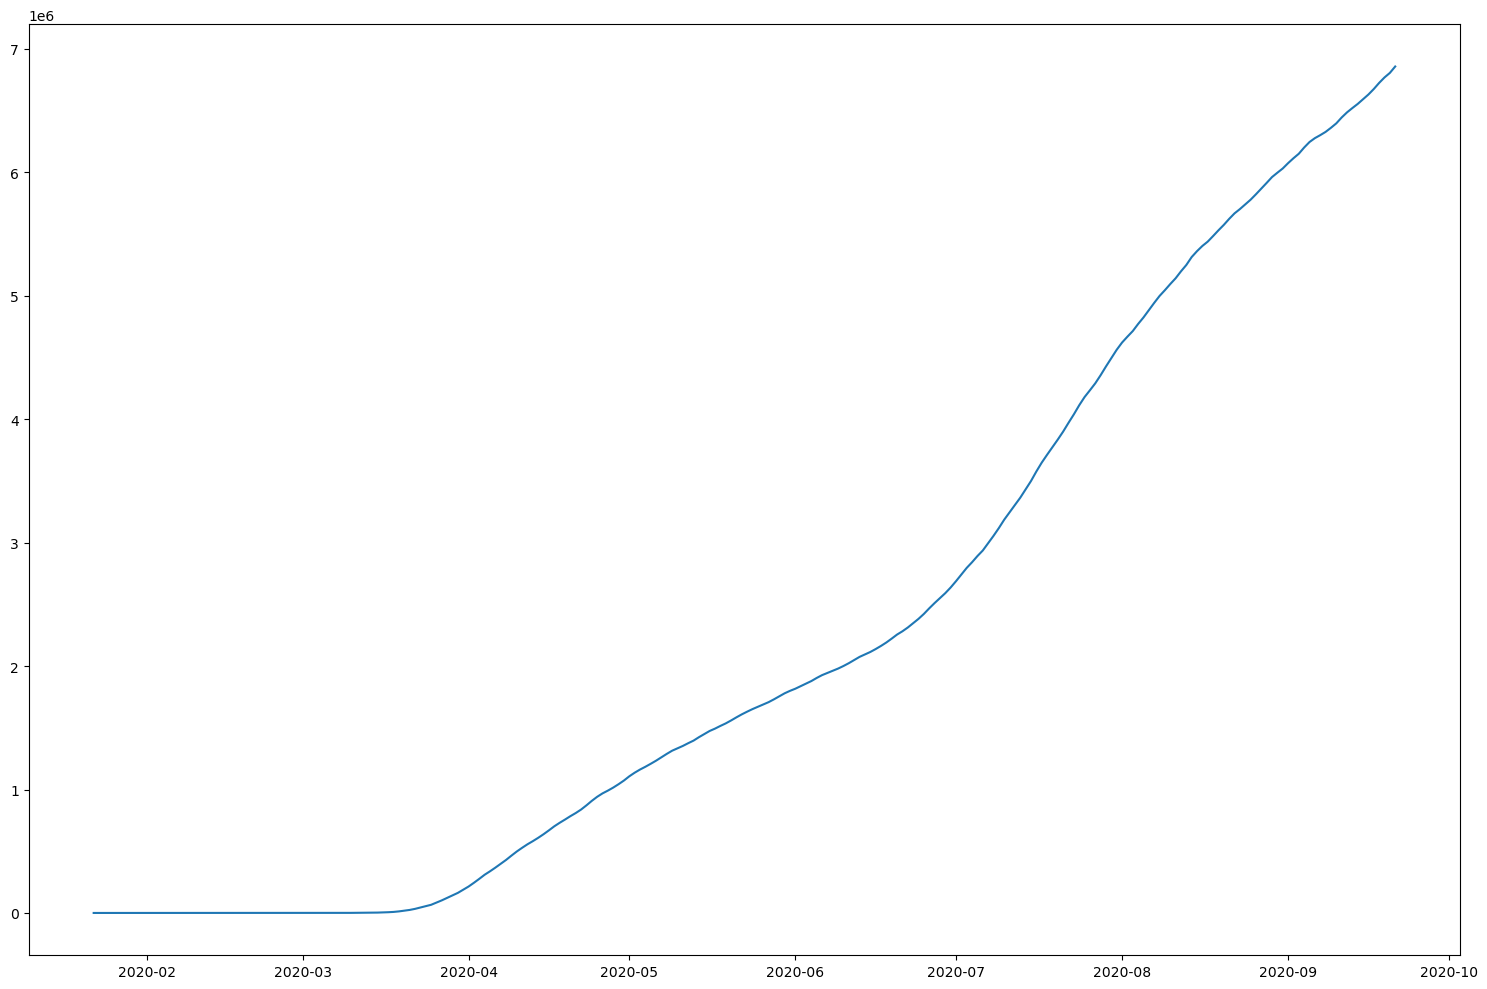

In [34]:
plt.figure(figsize=(15,10),facecolor='white')#canvas  size
plt.plot(Covid_data_us)#line plot 
plt.tight_layout()

* The Confirmed cases in US is showing the Trend in timeseries.

## Decompose time series components.

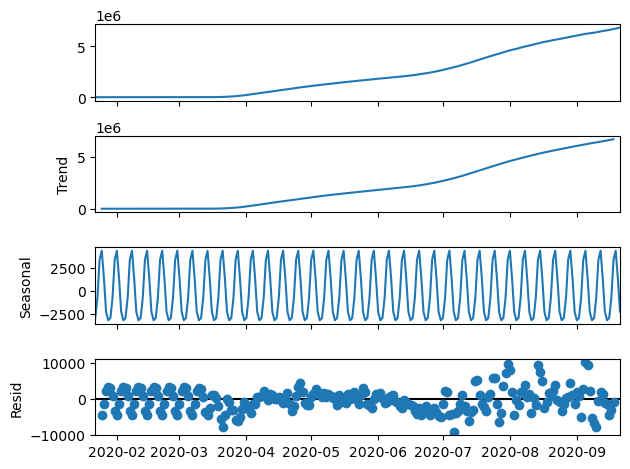

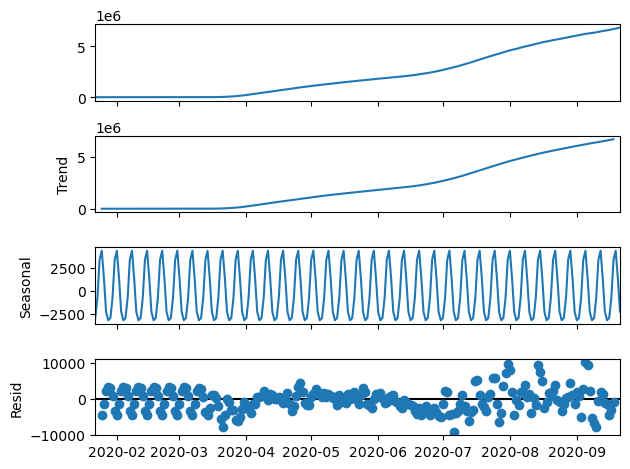

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(Covid_data_us, model = "additive")
decompose_data.plot()

# AD-Fuller Test

In [36]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(Covid_data_us.Count, autolag = 'AIC')
print("1. Test Statistics : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. Test Statistics :  2.1014254053136123
2. P-Value :  0.9987910822263308
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 232
5. Critical Values :
	 1% :  -3.458854867412691
	 5% :  -2.8740800599399323
	 10% :  -2.573453223097503


* As Test Statistics > Critical values and p-value > 0.05, the timeseries is not stationary so we have to make it stationary by differencing method.

# Differencing

### Differencing 1

In [37]:
data1=Covid_data_us.diff(periods=1)
data1

,Count
Date,
2020-01-22,NaN
2020-01-23,0.00
2020-01-24,1.00
2020-01-25,0.00
2020-01-26,3.00
...,...
2020-09-17,44360.00
2020-09-18,49522.00
2020-09-19,44186.00


In [38]:
data1=data1.iloc[1:] #null value discarded

In [39]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data1.Count, autolag = 'AIC')
print("1. Test Statistics : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. Test Statistics :  -1.6892737521001717
2. P-Value :  0.4366472636332885
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 227
5. Critical Values :
	 1% :  -3.4594900381360034
	 5% :  -2.8743581895178485
	 10% :  -2.573601605503697


* Again Test Statistics > Critical values and p-value > 0.05, the timeseries is not stationary so we have to make it stationary by differencing method.

### Differencing 2

In [40]:
data2=data1.diff(periods=1) # differencing applied to data1

In [41]:
data2=data2.iloc[1:]

In [42]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data2.Count, autolag = 'AIC')
print("1. Test Statistics : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. Test Statistics :  -2.4953581503715547
2. P-Value :  0.11660782591222857
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 226
5. Critical Values :
	 1% :  -3.4596204846395824
	 5% :  -2.8744153028455948
	 10% :  -2.5736320761218576


* Again Test Statistics > Critical values and p-value > 0.05, the timeseries is not stationary so we have to make it stationary by differencing method.

### Differencing 3

In [43]:
data3=data2.diff(periods=1) # differencing applied to data2

In [44]:
data3=data3.iloc[1:]

In [45]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data3.Count, autolag = 'AIC')
print("1. Test Statistics : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. Test Statistics :  -5.66154596255921
2. P-Value :  9.35504024158457e-07
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 225
5. Critical Values :
	 1% :  -3.4597521044060353
	 5% :  -2.874472927517147
	 10% :  -2.5736628197530864


* The p-value of 9.355040241588842e-07 is very small, much smaller than 0.05. Also our test statistics is smaller than critical values. Hence, we can say that our data is now stationary.


# Plot to check stationary

<Axes: xlabel='Date', ylabel='Count'>

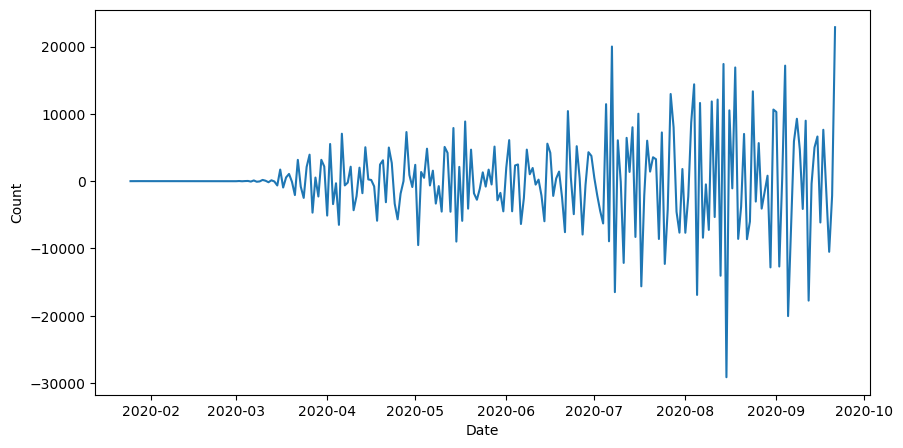

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data3, x=data3.index, y=data3.Count)

* In this plot also, our standard deviation and mean are constant hence we can say it is stationary.

# Plotting ACF and PACF plot

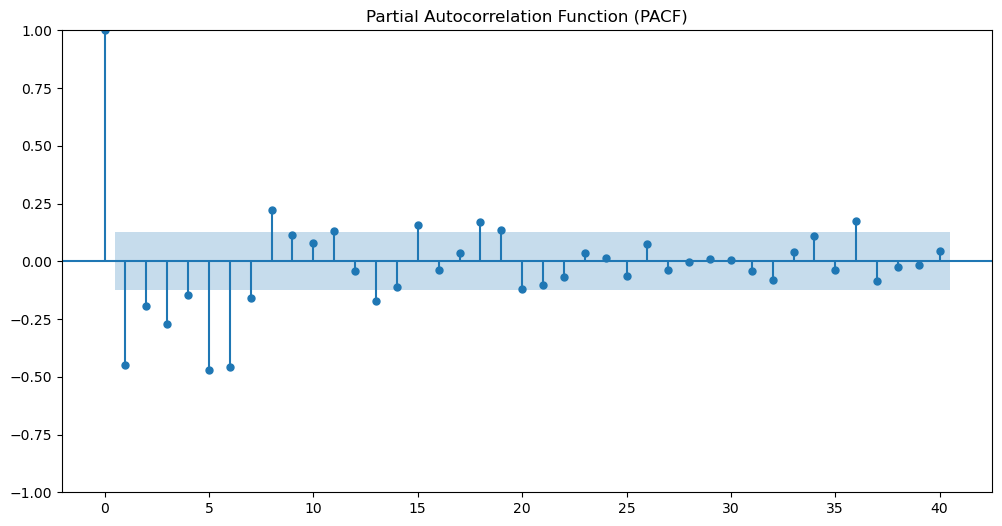

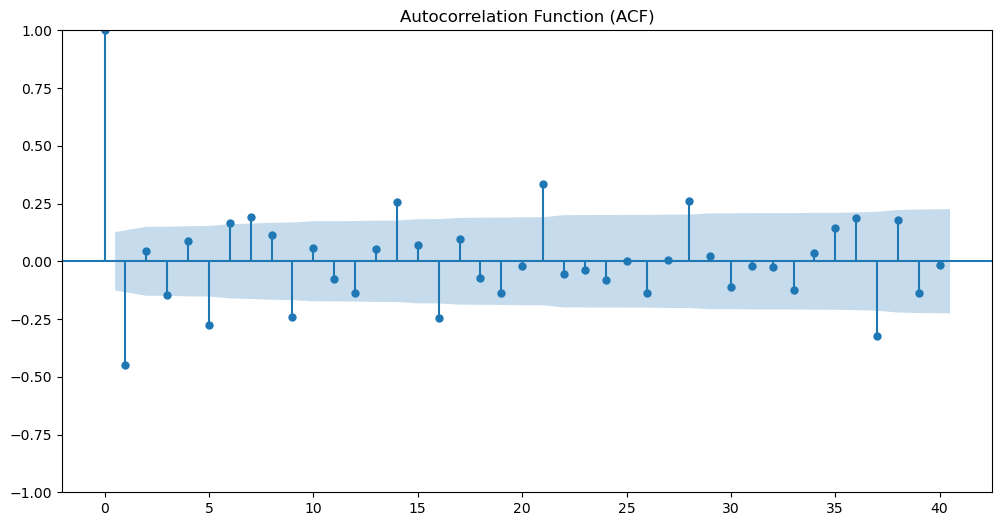

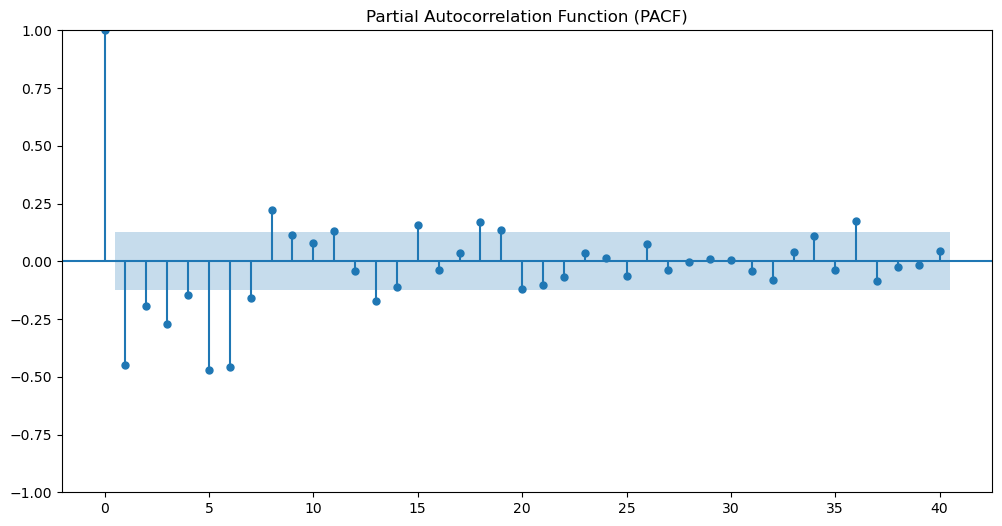

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data3, lags=40, ax=ax, title='Autocorrelation Function (ACF)')

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(data3, lags=40, ax=ax, title='Partial Autocorrelation Function (PACF)')

* By the ACF and PACF plot we will take the q value as 1, and p value as 8 and d value will be 3 as we have done differencing 3 times.

In [48]:
data3.shape

(241, 1)

# Training and testing of data

In [49]:
## Creating training and test sets
train=data3[:190]
test=data3[190:] 

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2020-08-02 to 2020-09-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   51 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes


# ARIMA Model

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train, order=(8,3,1))#order= p,d,q #based on intuition 
model_arima_fit = model_arima.fit()

* I have taken the (p,d,q) value as (8,3,1) as intuition of acf and pacf plot.

In [53]:
print(model_arima_fit.aic)

3735.869615951569


In [54]:
predictions = model_arima_fit.forecast(steps=10)

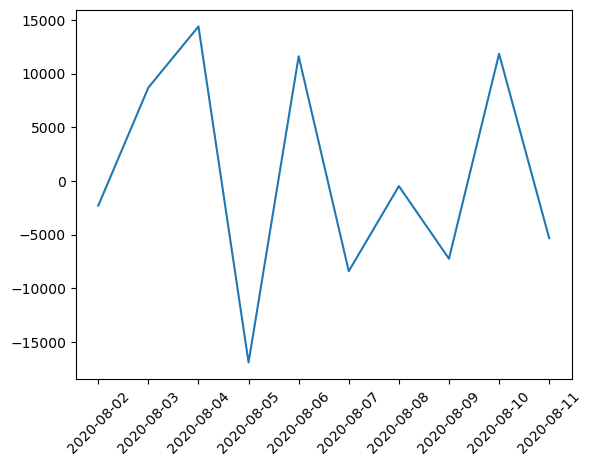

In [55]:
plt.plot(test[:10])
plt.xticks(rotation=45)
plt.show()

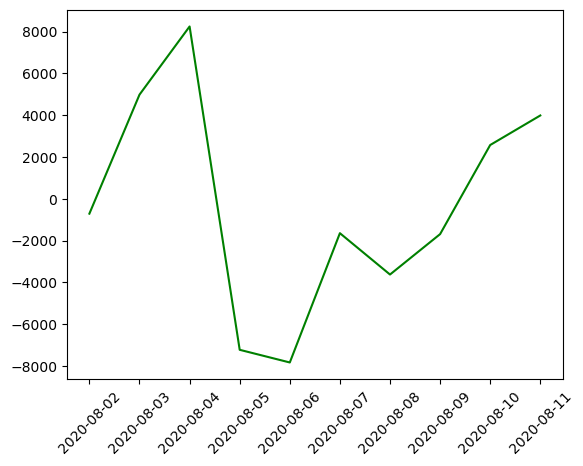

In [56]:
plt.plot(predictions,color='green')
plt.xticks(rotation=45)
plt.show()

In [57]:
import itertools
p =d= q=range(0,8)#values of p,d,q range from 0 to 5
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1,

In [58]:
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3749.2447484930453
(0, 0, 1) 3637.2963888252007
(0, 0, 2) 3638.7387604264227
(0, 0, 3) 3633.9638133081853
(0, 0, 4) 3616.268292061076
(0, 0, 5) 3616.352275304556
(0, 0, 6) 3608.167631431308
(0, 0, 7) 3607.0976235595026
(0, 1, 0) 3925.9631032154225
(0, 1, 1) 3735.2832859129244
(0, 1, 2) 3632.6300558963912
(0, 1, 3) 3633.3011325125594
(0, 1, 4) 3622.9000726958584
(0, 1, 5) 3611.713716019551
(0, 1, 6) 3611.2393552315384
(0, 1, 7) 3659.999935931587
(0, 2, 0) 4132.427613405551
(0, 2, 1) 3912.383846260335
(0, 2, 2) 3726.152055279806
(0, 2, 3) 3632.9649972586335
(0, 2, 4) 3653.703322532697
(0, 2, 5) 3698.0096760797064
(0, 2, 6) 3701.8533654273033
(0, 2, 7) 3789.4928752312776
(0, 3, 0) 4347.121014744207
(0, 3, 1) 4117.360283904671
(0, 3, 2) 3905.061669670619
(0, 3, 3) 3747.9585850450944
(0, 3, 4) 3680.8696886457046
(0, 3, 5) 3836.52595218487
(0, 3, 6) 3955.17104884763
(0, 3, 7) 3964.787252179793
(0, 4, 0) 4564.489245472745
(0, 4, 1) 4332.2641748189
(0, 4, 2) 4108.526876143321
(0, 4, 

(4, 4, 2) 3887.9114728023105
(4, 4, 3) 3867.5485990525067
(4, 4, 4) 3768.5801924561183
(4, 4, 5) 3789.9133338655424
(4, 4, 6) 3818.1951403730154
(4, 4, 7) 3801.2661013910156
(4, 5, 0) 4141.132853794816
(4, 5, 1) 4004.7121116492585
(4, 5, 2) 3952.6583362594642
(4, 5, 4) 3856.9816601666
(4, 5, 5) 3907.5405266093157
(4, 5, 6) 3907.879015476634
(4, 5, 7) 3908.613163577569
(4, 6, 0) 4291.975880525988
(4, 6, 1) 4188.6471844233465
(4, 6, 2) 4056.6778318053225
(4, 6, 3) 4032.9509845172656
(4, 6, 4) 3951.978031075847
(4, 6, 5) 4048.473135819302
(4, 6, 6) 4016.654626847371
(4, 6, 7) 4038.377164111197
(4, 7, 0) 4450.698921076619
(4, 7, 1) 4344.051624724825
(4, 7, 2) 4179.317563938656
(4, 7, 3) 4146.574187983615
(4, 7, 4) 4062.2020098066905
(4, 7, 5) 4181.513688315206
(4, 7, 6) 4148.617745878493
(4, 7, 7) 4173.893536733716
(5, 0, 0) 3632.6328118889764
(5, 0, 1) 3572.6624148702076
(5, 0, 2) 3526.9357477280173
(5, 0, 3) 3525.6600889207557
(5, 0, 4) 3531.021857932925
(5, 0, 5) 3529.607801782401
(5, 0

In [59]:
min(list2)  # lowest aic score

12.0

In [60]:
loc=list2.index(min(list2))
list1[loc]

(3, 5, 2)

In [61]:
model_arima = ARIMA(train, order=(3, 5,2))
model_arima_fit2 = model_arima.fit()

In [62]:
forecast = model_arima_fit2.forecast(steps=10)
forecast 

2020-08-02   -19648451251.26
2020-08-03   -20096882760.35
2020-08-04   -20552943332.40
2020-08-05   -21016718741.58
2020-08-06   -21488295298.12
2020-08-07   -21967759730.41
2020-08-08   -22455199302.88
2020-08-09   -22950701698.16
2020-08-10   -23454355134.94
2020-08-11   -23966248250.07
Freq: D, Name: predicted_mean, dtype: float64

## Plot based on iterating params over pdq

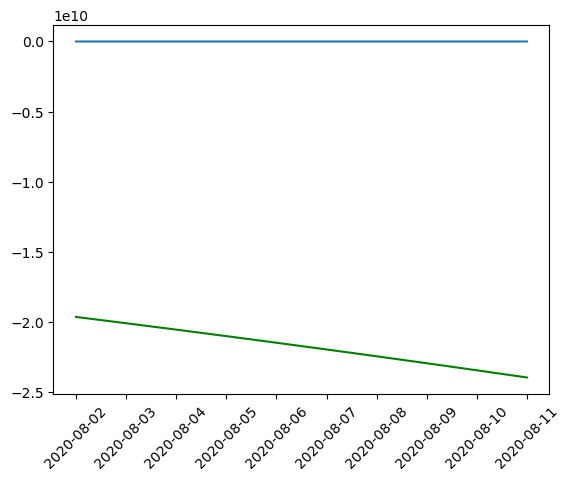

In [63]:
plt.plot(test[:10])
plt.plot(forecast,color='green')
plt.xticks(rotation=45)
plt.show()

## Plot based intuition

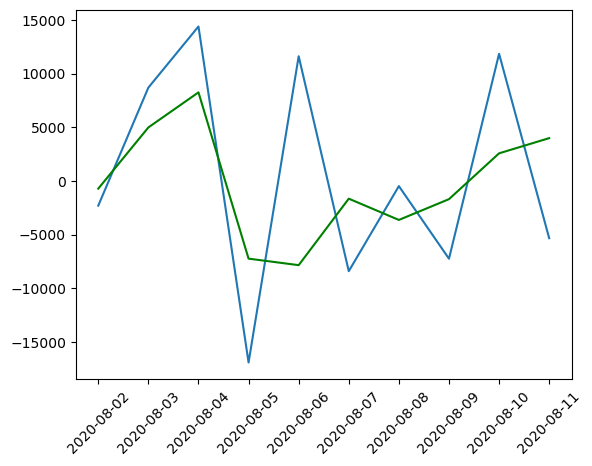

In [64]:
plt.plot(test[:10])
plt.plot(predictions,color='green')
plt.xticks(rotation=45)
plt.show()

* In the analysis, two plots were drawn: one using an iterative approach over various parameter combinations (pdq) and another based on intuition for selecting a specific pdq value. Remarkably, the plot derived from the intuition-driven pdq value outperformed the iterative approach

In [65]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -2298.,   8693.,  14384., -16902.,  11612.,  -8401.,   -480.,
        -7240.,  11840.,  -5329.,  12123., -14051.,  17403., -29128.,
        10516.,  -1071.,  16887.,  -8578.,  -3786.,   7013.,  -8623.,
        -6002.,  13341.,  -3033.,   5652.])

## Plot for next 25 forecasts.

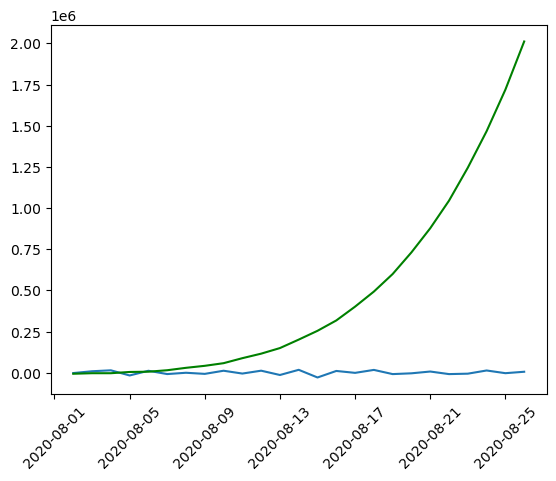

In [66]:
plt.plot(test[:25])
plt.plot(forecast25,color='green')
plt.xticks(rotation=45)
plt.show()

## Accuracy metrics

In [67]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 563828382300.5022, 'mae': 476834.1020695537, 'rmse': 750885.0659724844}

In [68]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))

750885.0659724844


* Our dataset contains so many confirmed cases so RMSE of 750885.06 is reasonable.

# SARIMAX Model

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(8,3,1), seasonal_order=(8,3,1,12))
model_sarima = model.fit()

In [70]:
print(model_sarima.aic)

3378.9746616107864


In [71]:
predictions_sarima = model_sarima.forecast(steps=10)

## Plot for next 10 forecasts.

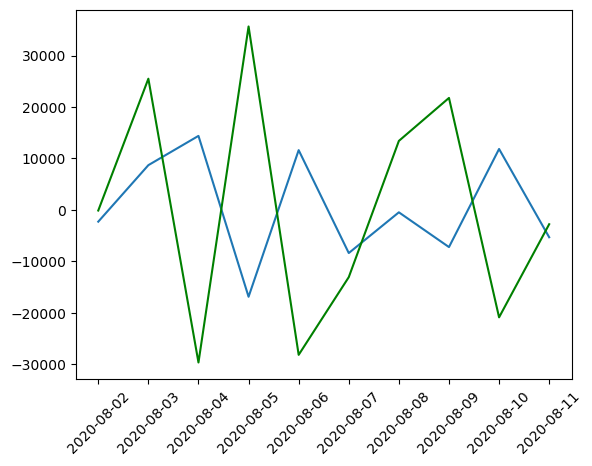

In [72]:
plt.plot(test[:10])
plt.plot(predictions_sarima,color='green')
plt.xticks(rotation=45)
plt.show()

In [73]:
forecast25 = model_sarima.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -2298.,   8693.,  14384., -16902.,  11612.,  -8401.,   -480.,
        -7240.,  11840.,  -5329.,  12123., -14051.,  17403., -29128.,
        10516.,  -1071.,  16887.,  -8578.,  -3786.,   7013.,  -8623.,
        -6002.,  13341.,  -3033.,   5652.])

## Plot for next 25 forecasts

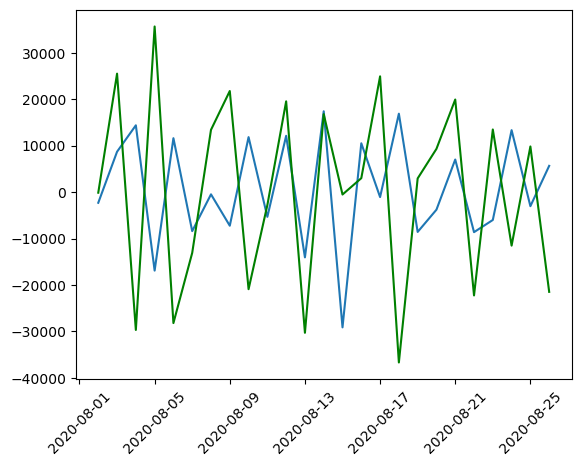

In [74]:
plt.plot(test[:25])
plt.plot(forecast25,color='green')
plt.xticks(rotation=45)
plt.show()

## Accuracy Metrics

In [75]:
forecast_accuracy(forecast25, test1)

{'mse': 640358110.8171579,
 'mae': 20550.97586188106,
 'rmse': 25305.298078014373}

In [76]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))

25305.298078014373


# Model Comparison Report
#### RMSE Score for the model

* ARIMA : 750885.06 


* SARIMAX : 25305.29

##### The SARIMAX model outperforms the ARIMA model in terms of prediction accuracy, as indicated by the lower RMSE score (25746.87   versus   750885.06).

# Suggestions for the US Government Health Department based on COVID-19 Time Series Analysis:

##### Global Preparedness:
Acknowledge the global impact of COVID-19, with data spanning 188 countries, emphasizing the need for collaborative global preparedness efforts.

##### Variable Counts:
Prepare for a wide range of reported counts (0.00 to 6,856,884), suggesting varied severity levels. Ensure resources accommodate potential large counts.

##### Temporal Trends:
Acknowledge temporal patterns, especially the peak in confirmed cases, recoveries, and deaths on September 21, 2020. Enhance preparedness for potential surges during similar periods.

##### Prioritize Testing and Surveillance:
Strengthen testing and surveillance efforts, particularly in regions with diverse latitudinal and longitudinal values, to identify and respond to emerging cases promptly.

##### Vaccination Strategy:
Implement a targeted vaccination strategy, focusing on countries and regions forecasted for increased cases. Prioritize vaccination efforts during critical temporal periods.

##### Collaborative Response:
Collaborate internationally for data sharing and coordinated responses. Leverage insights from countries like China to enhance preparedness measures.

##### Resource Allocation:
Allocate medical resources based on predicted trends, considering potential surges and varying severity levels across countries and regions.

##### Public Awareness Campaigns:
Enhance public awareness campaigns tailored to geographical and temporal trends. Communicate preventive measures, vaccination information, and resource availability effectively.




These recommendations aim to guide the government health department in developing a comprehensive and proactive strategy for preparedness and response to COVID-19, considering the insights derived from the data analysis.

# Report on Challenges Faced

Faced challenges in interacting separately with three datasets, leading to potential complexity and information loss. Due to AR model limitations with multiindex, opted to use only the date as an index. Decided to combine the three datasets for a more cohesive analysis and modeling approach. A significant challenge lies in determining optimal ARIMA parameters (p, d, q), requiring exploration of various combinations and iterative testing for model accuracy. Overall, streamlining data representation and addressing modeling challenges are crucial for effective time series forecasting.

# Conclusion

Concluding the time series analysis on the John Hopkins dataset for confirmed COVID-19 cases in the US, SARIMAX model with an RMSE of 25305.29 emerged as the best fit, providing a reasonable level of accuracy given the dataset's size. Challenges encountered included the need to interact separately with multiple datasets, prompting the decision to combine them for a comprehensive analysis. The choice to use ARIMA over SARIMAX was influenced by the dataset's nature. A significant difficulty was in determining the optimal ARIMA parameters (p, d, q), requiring thorough exploration and iterative testing. Despite challenges, the SARIMAX model showcased its effectiveness in capturing the temporal patterns of COVID-19 cases in the US, providing valuable insights for forecasting and decision-making.

# Thank you for taking the time to review this project.

Best regards,

Aarti Valase.